**Research Question 2**

How often is a Q1 fracture associated with an ECTP on the same layer?

## General Process
1. load files
2. Optional: Find pits with properties of interest
3. Create a list of dictionaries of properties of interest
4. Create a dataframe from the list of dictionaries

*Question: In the case of multiple CT and ECT results, which results should be used?*
* Do any tests


* Do any ECTs and CTs have P and Q1 on the same layer?
    If yes, then correlation


* Are ECTP and Q1 failure on the same layer?
* If multiple CTs, are they all the same shear quality?


*STEPS*
1. find pits with ECTP and CT with shear quality results
2. Find tests with failure on the same layer
3. If multiple of either test, select test with lowest fracture character

*FIRST QUESTION*
* Of pits that have ECTP results and CT results with Shear quality. When failure occurs on the same layer, how often (pie chart and/or percentage table) is the fracture character of the CT Q1?

In [1]:
# import libraries
import os

import matplotlib.pyplot as plt
import pandas as pd

from snowpylot.caaml_parser import caaml_parser


In [2]:
# Load xml files

# folder_path = "snowpits_200_MT" # The latest 200 snow pits from MT
folder_path = "snowpits/snowpits_1K"  # latest 1K snowpits from SnowPilot

# Create a list of all CAAML files in the folder
caaml_files = [
    f for f in os.listdir(folder_path) if f.endswith(".xml")
]  # List of all CAAML files in the folder

In [4]:
# Find pits with CT and ECT results

pits_with_ct_ect = []

for file in caaml_files:
    file_path = folder_path + "/" + file
    pit = caaml_parser(file_path)

    if len(pit.stability_tests.CT) > 0 and len(pit.stability_tests.ECT) > 0:
        pits_with_ct_ect.append(pit)


print(len(pits_with_ct_ect))  ## How many pits have CT and ECT results?

349


In [9]:
# Create summary df

# Create lists to store results
results_list = []

for pit in pits_with_ct_ect:
    ECTs = pit.stability_tests.ECT
    CTs = pit.stability_tests.CT

    for ect in ECTs:
        for ct in CTs:  # Every combination of ECT and CT results
            if (
                ect.depth_top == ct.depth_top and ect.propagation is True
            ):  # If failure on the same level and ECT has propagation
                results_dict = {
                    "PitID": pit.core_info.pit_id,
                    "ECT Score": ect.test_score,
                    "CT Shear Qual": ct.fracture_character,
                    "Depth": ect.depth_top[0],  # Add depth value
                    "Depth Unit": ect.depth_top[1],  # Add depth unit
                }
                results_list.append(results_dict)

# Create DataFrame
df = pd.DataFrame(results_list)

# Display summary statistics
print("Summary of results:")
print(f"Total number of matching ECT-CT pairs: {len(df)}")
print(f"Number of unique pits: {df['PitID'].nunique()}")



Summary of results:
Total number of matching ECT-CT pairs: 85
Number of unique pits: 67


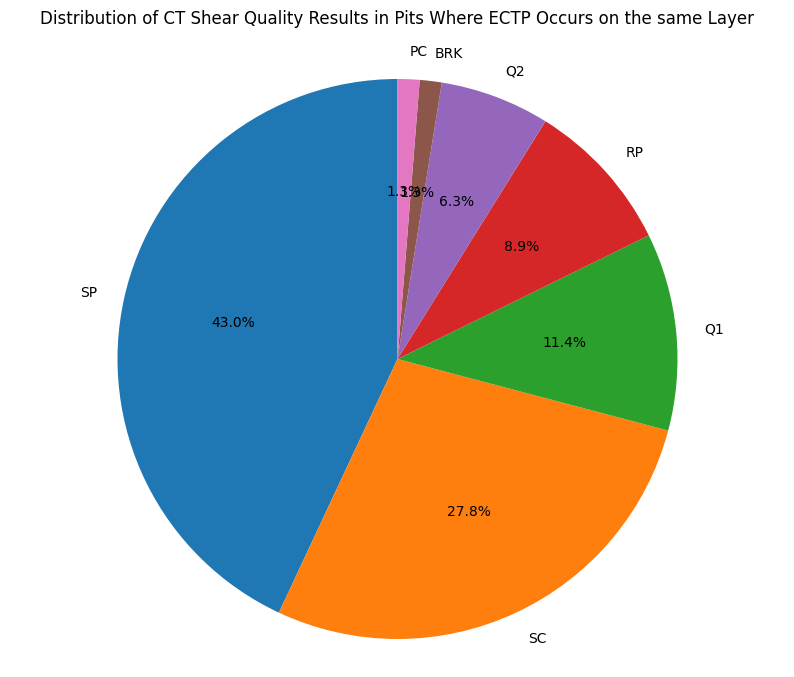


Shear Quality Distribution:
CT Shear Qual
SP     34
SC     22
Q1      9
RP      7
Q2      5
BRK     1
PC      1
Name: count, dtype: int64

Percentages:
CT Shear Qual
SP     40.0
SC     25.9
Q1     10.6
RP      8.2
Q2      5.9
BRK     1.2
PC      1.2
Name: count, dtype: float64


In [10]:
# Calculate value counts for ShearQual
shear_counts = df["CT Shear Qual"].value_counts()

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    shear_counts.values,
    labels=shear_counts.index,
    autopct="%1.1f%%",  # Show percentages with 1 decimal place
    startangle=90,
)  # Rotate start of pie to 90 degrees

# Add title
plt.title(
    "Distribution of CT Shear Quality Results in Pits Where ECTP Occurs on the same Layer",
    pad=20,
)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")

# Show the plot
plt.show()

# Optional: Print the actual counts and percentages
print("\nShear Quality Distribution:")
print(shear_counts)
print("\nPercentages:")
print((shear_counts / len(df["CT Shear Qual"]) * 100).round(1))